In [4]:
#pip install pandas-profiling==3.6.2

In [1]:
from tcrdist.repertoire import TCRrep
from tcrdist.plotting import plot_pairings, _write_svg
import pandas as pd
from tcrdist.repertoire import TCRrep
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
df_copy= pd.read_csv('vdjdb.txt',sep='\t')

profile=ProfileReport(df,title='data report')

In [4]:
df_copy.head()

complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   
3           2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4           2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species     mhc.a mhc.b mhc.class antigen.epitope antigen.gene  \
0  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
1  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
2  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
3  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   
4  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL          Nef   

  antigen.species   reference.id  \
0           HIV-1  PMID:15596521   
1           HIV-1  PMID:15596521   
2           HIV-1  PMID:15596521   
3           HIV-1  PMID:15596521   
4           HIV-1  PMID:15596521   

                                              method  \
0  {"frequency": "", "identification": "tetramer-...   
1  {"frequency": "", "identification": "tetramer-...   
2  {"frequency": "", "identification": "tetramer-...   
3  {"frequency": "", "identification": "tetramer-...   
4  {"frequency": "", "identification": "tetramer-...   

                                                meta  \
0  {"cell.subset": "CD8+", "clone.id": "", "donor...   
1  {"cell.subset": "CD8+", "clone.id": "", "donor...   
2  {"cell.subset": "CD8+", "clone.id": "", "donor...   
3  {"cell.subset": "CD8+", "clone.id": "", "donor...   
4  {"cell.subset": "CD8+", "clone.id": "", "donor...   

                                             cdr3fix  vdjdb.score web.method  \
0  {"cdr3": "CIVRAPGRADMRF", "cdr3_old": "CIVRAPG...            2       sort   
1  {"cdr3": "CASSYLPGQGDHYSNQPQHF", "cdr3_old": "...            2       sort   
2  {"cdr3": "CASSFEAGQGFFSNQPQHF", "cdr3_old": "C...            2       sort   
3  {"cdr3": "CAVPSGAGSYQLTF", "cdr3_old": "CAVPSG...            2       sort   
4  {"cdr3": "CASSFEPGQGFYSNQPQHF", "cdr3_old": "C...            2       sort   

  web.method.seq web.cdr3fix.nc web.cdr3fix.unmp  
0         sanger             no               no  
1         sanger             no               no  
2         sanger             no               no  
3         sanger             no               no  
4         sanger             no               no

In [5]:
len(df_copy)

92771

In [6]:
#df1=df[['antigen.epitope','antigen.gene','antigen.species']]

proof reference for the making the HIV and HIV-1 and HIV1 are the same 
 - https://www.aidsmap.com/about-hiv/hiv-1-and-hiv-2#:~:text=HIV%2D1%20comprises%20groups%20M,2%20subtypes%2C%20A%20and%20B.&text=Due%20to%20the%20genetic%20difference,not%20reliably%20detect%20HIV%2D2.
 - https://www.frontiersin.org/articles/10.3389/fimmu.2019.02820/full(Using random forest)

In [7]:
df1=df_copy[df_copy['vdjdb.score'].isin([2, 3,1])]

In [8]:
len(df1)

12414

In [9]:
df1 = df1.drop(['reference.id', 'method', 'meta','cdr3fix'], axis=1)

In [10]:
df1['antigen.species'].unique()

array(['HIV-1', 'TriticumAestivum', 'SARS-CoV-2', 'HomoSapiens', 'CMV',
       'M.tuberculosis', 'EBV', 'HTLV-1', 'GallusGallus', 'MusMusculus',
       'InfluenzaA', 'Synthetic', 'VSV', 'SaccharomycesCerevisiae',
       'ManducaSexta', 'HCV', 'synthetic', 'E.Coli', 'HHV', 'LCMV',
       'DENV1', 'DENV3/4', 'PlasmodiumBerghei',
       'SelaginellaMoellendorffii', 'PseudomonasFluorescens',
       'PseudomonasAeruginosa', 'HIV1', 'Homo sapiens', 'YFV', 'RSV',
       'HSV-2', 'DENV2', 'HPV-16', 'MCMV', 'MCPyV', 'Wheat', 'SIV', 'HIV'],
      dtype=object)

In [11]:
import numpy as np

# Define the amino acid alphabet
amino_acid_alphabet = 'ACDEFGHIKLMNPQRSTVWY'

def cdr_to_one_hot(cdr_sequence):
    one_hot_encoding = np.zeros((len(cdr_sequence), len(amino_acid_alphabet)))

    for i, amino_acid in enumerate(cdr_sequence):
        #print(i,amino_acid)
        if amino_acid in amino_acid_alphabet:
            index = amino_acid_alphabet.index(amino_acid)
            one_hot_encoding[i, index] = 1

    return one_hot_encoding

# Example CDR sequence
cdr_sequence = "CASSYLPGQGDHYSNQPQHF"

# Convert CDR sequence to one-hot representation
one_hot_representation = cdr_to_one_hot(cdr_sequence)

# Display the result
print("CDR Sequence:", cdr_sequence)
print("One-Hot Representation:")
print(one_hot_representation)

CDR Sequence: CASSYLPGQGDHYSNQPQHF
One-Hot Representation:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 

### Similarity Distance

In [28]:
df=df_copy.copy()

In [29]:
df.isna().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

In [30]:
df=df.dropna()
print(len(df))
df=df[df['vdjdb.score']!=0]

90071


In [31]:
len(df)

12042

In [32]:
df1 = df.drop(['reference.id', 'method', 'meta','cdr3fix','vdjdb.score','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp'], axis=1)

In [33]:
df_aa= df1[df1['gene']=='TRA']
df_bb= df1[df1['gene']=='TRB']

## Alpha Chain

In [284]:
df_alpha=df_aa.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [285]:
df_alpha = df_alpha.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [286]:
len(df_alpha)

3653

In [287]:
df_alpha=df_alpha.drop_duplicates()
df_alpha

cdr3_a_aa         v_a_gene   j_a_gene      subject  \
0          CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
3         CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
7          CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
9          CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
12        CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
...                  ...              ...        ...          ...   
92681         CIALNARLMF      TRAV26-1*01  TRAJ31*01  HomoSapiens   
92683   CAMREGRYSSASKIIF    TRAV14/DV4*01   TRAJ3*01  HomoSapiens   
92685   CLVGDGDGGATNKLIF         TRAV4*01  TRAJ32*01  HomoSapiens   
92689  CAASVLYGSSNTGKLIF    TRAV29/DV5*01  TRAJ37*01  HomoSapiens   
92767       CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01  HomoSapiens   

             epitope  
0           FLKEKGGL  
3           FLKEKGGL  
7           FLKEKGGL  
9           FLKEQGGL  
12          FLKEQGGL  
...              ...  
92681   PQPELPYPQPQL  
92683   FPQPEQPFPWQP  
92685   FPQPEQPFPWQP  
92689   QLQPFPQPELPY  
92767  PQQPFPQPEQPFP  

[2421 rows x 5 columns]

### Mouse

In [23]:
df_am=df_alpha[df_alpha['subject']=='MusMusculus']
df_am=df_am.drop(['subject'], axis=1)
print(len(df_am))

640


In [24]:
tr_am = TCRrep(cell_df = df_am,
            organism = 'mouse',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_am.pw_alpha
tr_am.kargs_a['cdr3_a_aa']['gap_penalty'] = 5 
#tr_am.kargs_b['cdr3_b_aa']['gap_penalty'] = 5 

tr_am.compute_distances()
tr_am.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 27, 25, ..., 40, 40, 23],
       [27,  0, 22, ..., 13, 13, 33],
       [25, 22,  0, ..., 37, 39, 27],
       ...,
       [40, 13, 37, ...,  0,  4, 37],
       [40, 13, 39, ...,  4,  0, 39],
       [23, 33, 27, ..., 37, 39,  0]], dtype=int16)

In [30]:
Alpha_mouse_vector = pd.DataFrame(tr_am.pw_cdr3_a_aa)
#Alpha_mouse_vector.to_csv('Alpha_mouse_vector.csv')

In [60]:
df1 = df_am.reset_index(drop=True)
df2 = Alpha_mouse_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Alpha_mouse_vector.csv')

In [88]:
import umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_am.pw_cdr3_a_aa)
embedding = reducer.fit_transform(human_data)

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [89]:
l=df_am['epitope'].tolist()
embedding_df['epitope']=l

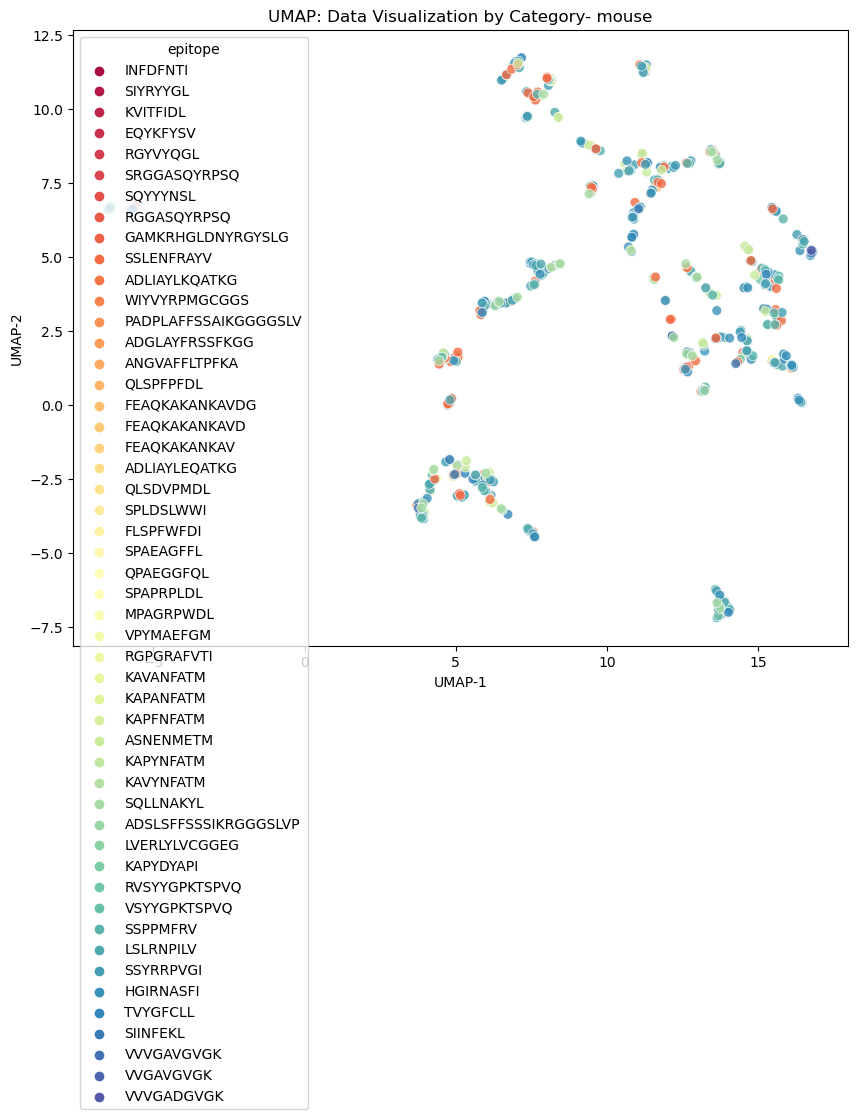

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- mouse')
plt.show()

np.savetxt('Alpha_mouse.csv',tr_am.pw_cdr3_a_aa,delimiter=',',fmt='%d')

### Human

In [31]:
df_ah=df_alpha[df_alpha['subject']=='HomoSapiens']
#df_ah=df_h.drop(['subject'], axis=1)

In [32]:
len(df_ah)

1781

In [33]:
tr_ah = TCRrep(cell_df = df_ah,
            organism = 'human',
            chains = ['alpha'],
            db_file = 'alphabeta_gammadelta_db.tsv')
#tr_ah.pw_alpha
tr_ah.kargs_a['cdr3_a_aa']['gap_penalty'] = 5 
#tr_am.kargs_b['cdr3_b_aa']['gap_penalty'] = 5 
tr_ah.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:792: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.cell_df['count'] = 1
C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable 

array([[ 0, 30, 30, ..., 33, 28, 36],
       [30,  0,  0, ..., 31, 32, 35],
       [30,  0,  0, ..., 31, 32, 35],
       ...,
       [33, 31, 31, ...,  0, 32, 19],
       [28, 32, 32, ..., 32,  0, 35],
       [36, 35, 35, ..., 19, 35,  0]], dtype=int16)

In [34]:
Alpha_human_vector = pd.DataFrame(tr_ah.pw_cdr3_a_aa)
#Alpha_human_vector.to_csv('Alpha_human_vector.csv')

In [61]:
df1 = df_ah.reset_index(drop=True)
df2 = Alpha_human_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Alpha_human_vector.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


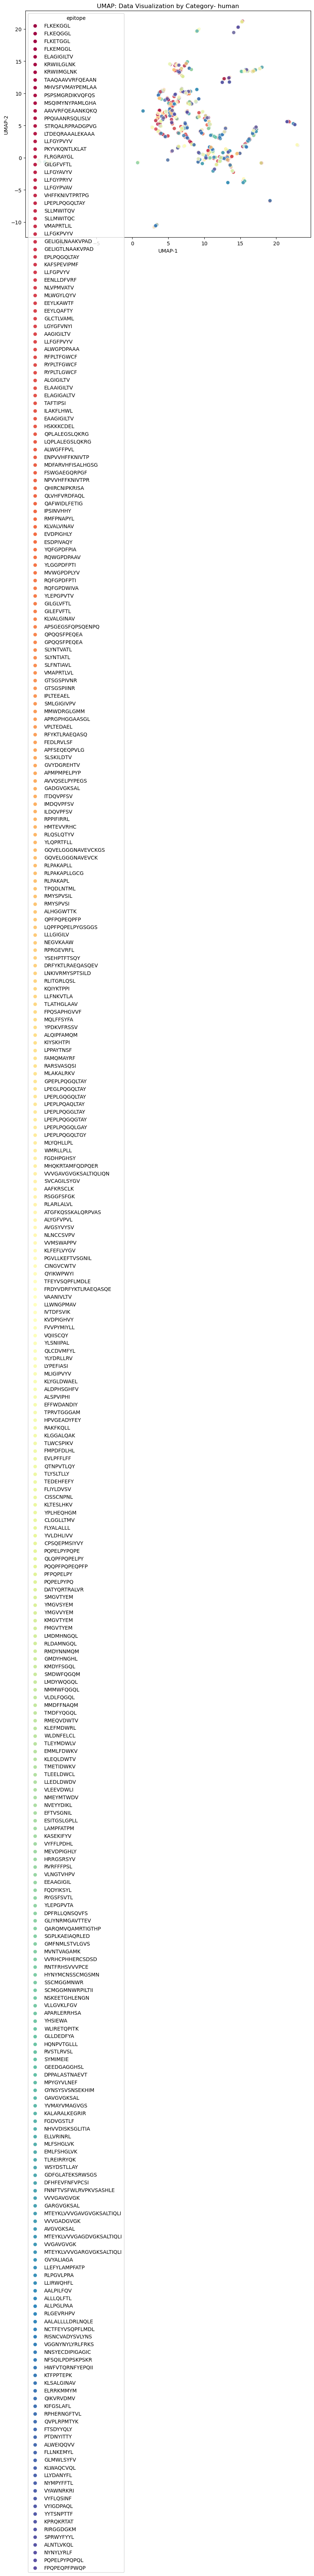

In [119]:
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_ah.pw_cdr3_a_aa)
embedding = reducer.fit_transform(human_data)

embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ah['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- human')
plt.show()

In [95]:
l=df_ah['epitope'].tolist()
embedding_df['epitope']=l

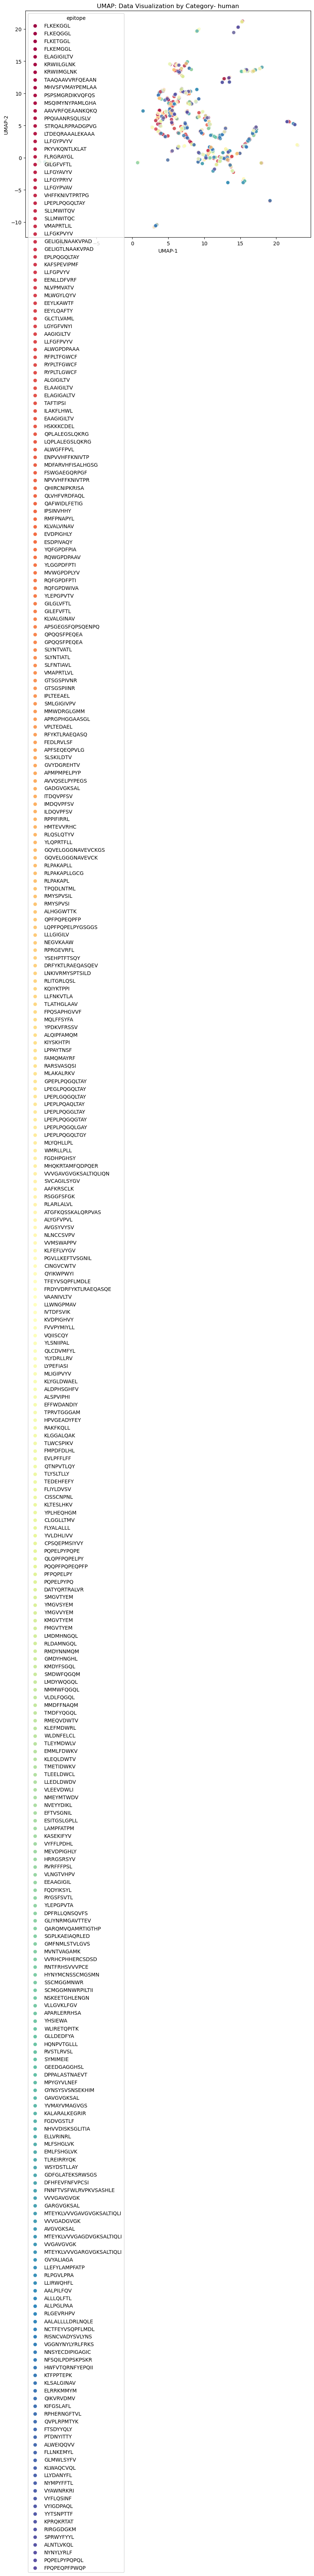

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- human')
plt.show()

In [313]:
np.savetxt('Alpha_human.csv',tr_ah.pw_cdr3_a_aa,delimiter=',',fmt='%d')

## Beta Chain

In [17]:
df_bb=df_bb.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_b_gene','j.segm': 'j_b_gene','cdr3': 'cdr3_b_aa','species':'subject'})

In [18]:
df_Beta = df_bb.drop(['complex.id', 'gene', 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [19]:
len(df_bb)

8389

### Mouse

In [20]:
df_bm=df_Beta[df_Beta['subject']=='MusMusculus']
df_bm=df_bm.drop(['subject'], axis=1)
df_bm = df_bm.groupby(list(df_bm.columns)).size().reset_index(name='count')

In [21]:
tr_bm = TCRrep(cell_df = df_bm,
            organism = 'mouse',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm.pw_beta
tr_bm.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000016262871C60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 32, 25, ..., 47, 47, 31],
       [32,  0, 24, ..., 35, 31, 31],
       [25, 24,  0, ..., 39, 39, 34],
       ...,
       [47, 35, 39, ...,  0,  5, 35],
       [47, 31, 39, ...,  5,  0, 35],
       [31, 31, 34, ..., 35, 35,  0]], dtype=int16)

In [22]:
Beta_mouse_vector = pd.DataFrame(tr_bm.pw_cdr3_b_aa)
#Beta_mouse_vector.to_csv('Beta_mouse_vector.csv')

In [23]:
#tr_bm.clone_df

In [24]:
df1 = df_bm.reset_index(drop=True)
df2 = Beta_mouse_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Beta_mouse_vector.csv')

In [25]:
print(tr_bm.pw_cdr3_b_aa.shape)
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bm.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
len(embedding)

(745, 745)


C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


745

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


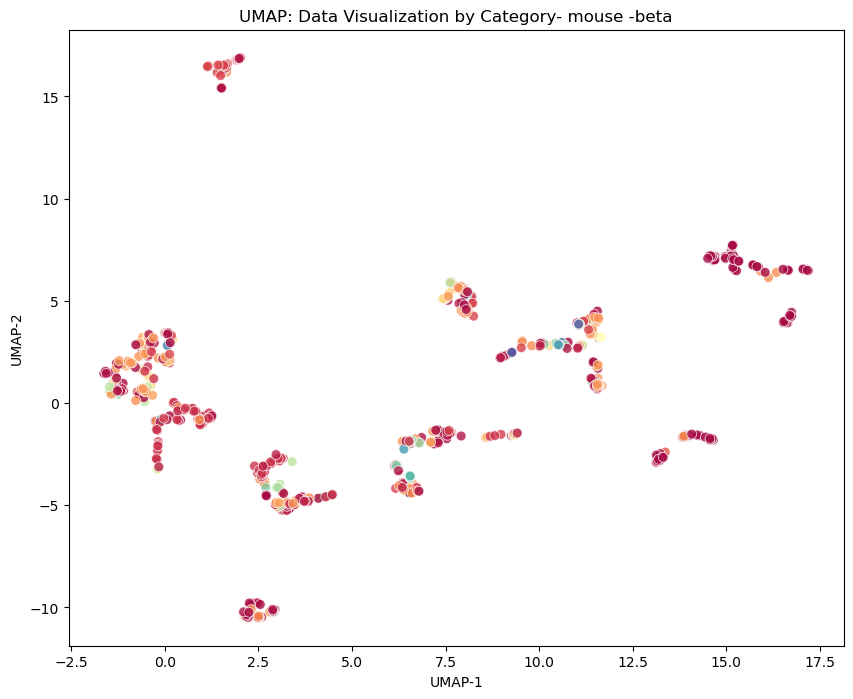

In [26]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bm.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_bm['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8,legend=False)
plt.title('UMAP: Data Visualization by Category- mouse -beta')
plt.show()

In [314]:
np.savetxt('Beta_mouse.csv',tr_bm.pw_cdr3_b_aa,delimiter=',',fmt='%d')

### Human

In [67]:
df_bh=df_Beta[df_Beta['subject']=='HomoSapiens']
print(len(df_bh))
df_bh=df_bh.drop(['subject'], axis=1)
df_bh = df_bh.groupby(list(df_bh.columns)).size().reset_index(name='count')

6539


In [68]:
tr_bh = TCRrep(cell_df = df_bh,
            organism = 'human',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bh.pw_beta
tr_bh.pw_cdr3_b_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000017E9F3ADA80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 38, 36, ..., 40, 34, 33],
       [38,  0, 23, ..., 40, 32, 36],
       [36, 23,  0, ..., 52, 36, 26],
       ...,
       [40, 40, 52, ...,  0, 35, 47],
       [34, 32, 36, ..., 35,  0, 32],
       [33, 36, 26, ..., 47, 32,  0]], dtype=int16)

In [69]:
Beta_human_vector = pd.DataFrame(tr_bh.pw_cdr3_b_aa)
#Beta_human_vector.to_csv('Beta_human_vector.csv')

In [70]:
df1 = df_bh.reset_index(drop=True)
df2 = Beta_human_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('Beta_human_vector.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


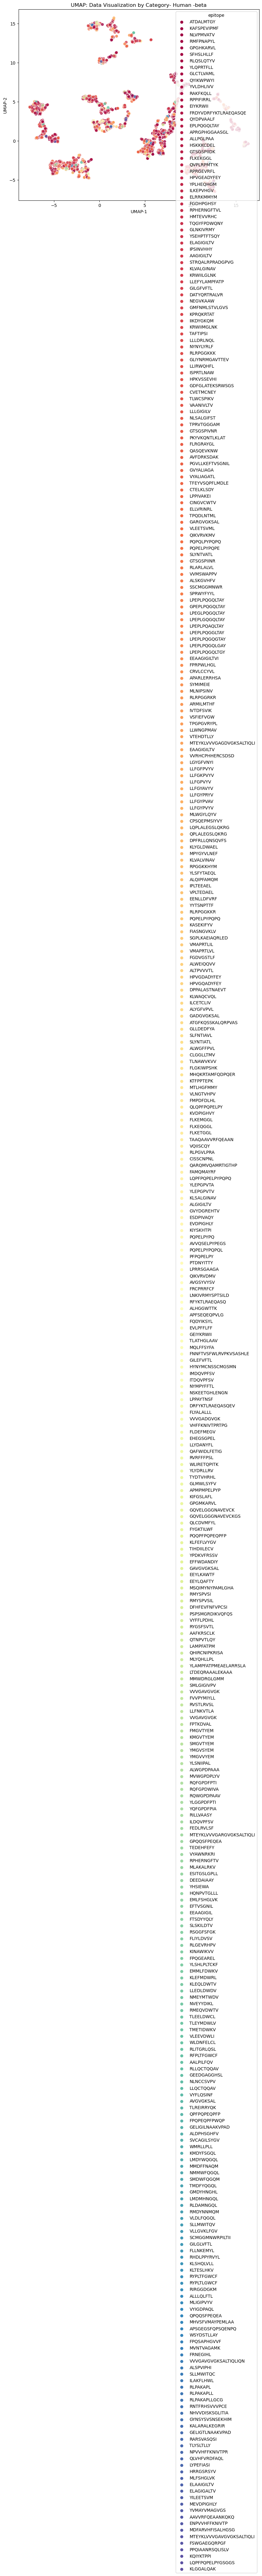

In [135]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(tr_bh.pw_cdr3_b_aa)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_bh['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8)
plt.title('UMAP: Data Visualization by Category- Human -beta')
plt.show()

### Alpha and Beta Chain

In [35]:
df_a_b = df1.loc[(df1['complex.id']!=0)]
df_a_b=df_a_b.rename(columns={'antigen.epitope': 'epitope', 'v.segm': 'v_a_gene','j.segm': 'j_a_gene','cdr3': 'cdr3_a_aa','species':'subject'})

In [36]:
len(df_a_b)

5623

In [37]:
df_a_b = df_a_b.drop([ 'mhc.a','mhc.b','mhc.class','antigen.gene','antigen.species'], axis=1)

In [38]:
df_paired_alpha=df_a_b.loc[df_a_b.gene=='TRA']
df_paired_beta=df_a_b.loc[df_a_b.gene=='TRB']

In [39]:
df_paired_ab=pd.merge(df_paired_alpha, df_paired_beta, on='complex.id', how='outer')
df_paired_ab1=df_paired_ab.dropna()
df_paired_ab1 = df_paired_ab1.drop([ 'gene_x','subject_x','epitope_x','gene_y','complex.id'], axis=1)
df_paired_ab1=df_paired_ab1.rename(columns={'cdr3_a_aa_x':'cdr3_a_aa','cdr3_a_aa_y':'cdr3_b_aa','v_a_gene_x': 'v_a_gene', 'j_a_gene_x': 'j_a_gene','v_a_gene_y': 'v_b_gene','cdr3': 'cdr3_a_aa','j_a_gene_y':'j_b_gene','epitope_y':'epitope'})

In [40]:
df_paired_ab1

cdr3_a_aa         v_a_gene   j_a_gene             cdr3_b_aa  \
0         CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  CASSYLPGQGDHYSNQPQHF   
1        CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   CASSFEPGQGFYSNQPQHF   
2         CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01        CASSALASLNEQFF   
3         CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  CASSYLPGQGDHYSNQPQHF   
4        CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01   CASSFEPGQGFYSNQPQHF   
...                 ...              ...        ...                   ...   
2784         CIALNARLMF      TRAV26-1*01  TRAJ31*01         CASSLRATDTQYF   
2785   CAMREGRYSSASKIIF    TRAV14/DV4*01   TRAJ3*01       CATSRAGGGGEKLFF   
2786   CLVGDGDGGATNKLIF         TRAV4*01  TRAJ32*01        CASSQGSGGNEQFF   
2787  CAASVLYGSSNTGKLIF    TRAV29/DV5*01  TRAJ37*01      CASSIVGSGGYNEQFF   
2788       CAPQGATNKLIF      TRAV12-2*01  TRAJ32*01       CASSLGAGGQETQYF   

        v_b_gene    j_b_gene    subject_y        epitope  
0      TRBV13*01  TRBJ1-5*01  HomoSapiens       FLKEKGGL  
1      TRBV13*01  TRBJ1-5*01  HomoSapiens       FLKEKGGL  
2      TRBV14*01  TRBJ2-1*01  HomoSapiens       FLKEKGGL  
3      TRBV13*01  TRBJ1-5*01  HomoSapiens       FLKEQGGL  
4      TRBV13*01  TRBJ1-5*01  HomoSapiens       FLKEQGGL  
...          ...         ...          ...            ...  
2784  TRBV7-2*01  TRBJ2-3*01  HomoSapiens   PQPELPYPQPQL  
2785   TRBV15*01  TRBJ1-4*01  HomoSapiens   FPQPEQPFPWQP  
2786  TRBV4-3*01  TRBJ2-1*01  HomoSapiens   FPQPEQPFPWQP  
2787   TRBV19*01  TRBJ2-1*01  HomoSapiens   QLQPFPQPELPY  
2788  TRBV5-1*01  TRBJ2-5*01  HomoSapiens  PQQPFPQPEQPFP  

[2716 rows x 8 columns]

### Mouse

In [41]:
df_ab_bm=df_paired_ab1 [df_paired_ab1 ['subject_y']=='MusMusculus']
df_ab_bm=df_ab_bm.drop(['subject_y'], axis=1)
df_ab_bm = df_ab_bm.groupby(list(df_ab_bm.columns)).size().reset_index(name='count')

In [42]:
tr_bm_ab = TCRrep(cell_df = df_ab_bm,
            organism = 'mouse',
            chains = ['alpha','beta'],
            db_file = 'alphabeta_gammadelta_db.tsv')
tr_bm_ab.pw_beta
tr_bm_ab.pw_cdr3_b_aa
tr_bm_ab.pw_alpha
tr_bm_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000016262871C60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0, 24, 24, ..., 36, 36, 23],
       [24,  0, 20, ..., 12, 12, 30],
       [24, 20,  0, ..., 34, 36, 26],
       ...,
       [36, 12, 34, ...,  0,  4, 33],
       [36, 12, 36, ...,  4,  0, 35],
       [23, 30, 26, ..., 33, 35,  0]], dtype=int16)

##### now we will make few changes to the weights and experiment on it if we get a better accuracy 

In [45]:
tr_bm_ab = TCRrep(cell_df = df_ab_bm,
            organism = 'mouse',
            chains = ['alpha','beta'],
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 3,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 3,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }
tr_bm_ab.metrics_a = metrics_a
tr_bm_ab.metrics_b = metrics_b

tr_bm_ab.weights_a = weights_a
tr_bm_ab.weights_b = weights_b

tr_bm_ab.kargs_a = kargs_a 
tr_bm_ab.kargs_b = kargs_b

tr_bm_ab.compute_distances()

tr_bm_ab.pw_beta
tr_bm_ab.pw_cdr3_b_aa
tr_bm_ab.pw_alpha
tr_bm_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000016262871C60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0,  8,  7, ..., 12, 12,  9],
       [ 8,  0,  5, ...,  4,  4, 11],
       [ 7,  5,  0, ...,  9,  9,  9],
       ...,
       [12,  4,  9, ...,  0,  1, 10],
       [12,  4,  9, ...,  1,  0, 10],
       [ 9, 11,  9, ..., 10, 10,  0]])

In [46]:
human_paired=tr_bm_ab.pw_beta+tr_bm_ab.pw_alpha
human_paired

array([[ 0, 84, 78, ..., 88, 99, 64],
       [84,  0, 29, ..., 71, 34, 93],
       [78, 29,  0, ..., 84, 44, 85],
       ...,
       [88, 71, 84, ...,  0, 46, 66],
       [99, 34, 44, ..., 46,  0, 74],
       [64, 93, 85, ..., 66, 74,  0]])

In [47]:
paired_vector = pd.DataFrame(human_paired)
#paired_vector.to_csv('Paired_vector.csv')

In [495]:
df1 = df_ab_bm.reset_index(drop=True)
df2 = paired_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('paired_vector_mouse_hamming.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


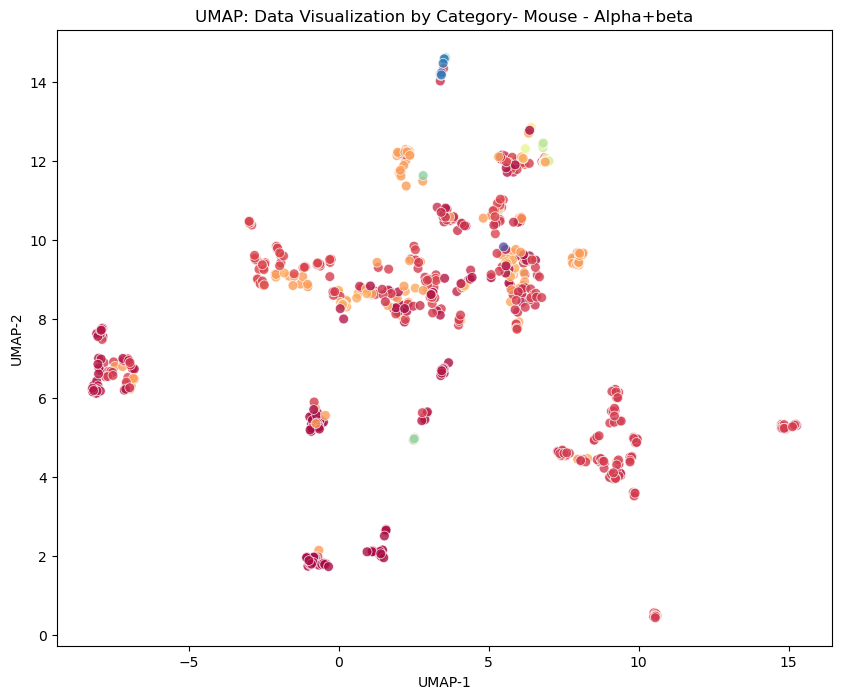

In [48]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ab_bm['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8,legend=False)
plt.title('UMAP: Data Visualization by Category- Mouse - Alpha+beta')
plt.show()

### Human

In [44]:
import pwseqdist as pw
import Levenshtein as lev

In [49]:
df_ab_bh=df_paired_ab1 [df_paired_ab1 ['subject_y']=='HomoSapiens']
#print(df_ab_bh)
df_ab_bh=df_ab_bh.drop(['subject_y'], axis=1)
df_ab_bh = df_ab_bh.groupby(list(df_ab_bh.columns)).size().reset_index(name='count')
print(len(df_ab_bh))
#print(df_ab_bh.head())

1462


In [50]:
def levenshtein_metric(seq1, seq2):
    return lev.distance(seq1, seq2)

alphabeta_gammadelta_db.tsv

In [51]:
tr_bh_ab = TCRrep(cell_df = df_ab_bh,
            organism = 'human',
            chains = ['alpha','beta'],
            use_defaults=False,
            compute_distances = False,
            cpus = 1,
            db_file = 'alphabeta_gammadelta_db.tsv')

metrics_a = {
    "cdr3_a_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_a_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_a_aa" : pw.metrics.nw_hamming_metric }

metrics_b = {
    "cdr3_b_aa" : pw.metrics.nw_hamming_metric ,
    "pmhc_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr2_b_aa" : pw.metrics.nw_hamming_metric ,
    "cdr1_b_aa" : pw.metrics.nw_hamming_metric  }

weights_a = { 
    "cdr3_a_aa" : 3,
    "pmhc_a_aa" : 1,
    "cdr2_a_aa" : 1,
    "cdr1_a_aa" : 1}

weights_b = { 
    "cdr3_b_aa" : 3,
    "pmhc_b_aa" : 1,
    "cdr2_b_aa" : 1,
    "cdr1_b_aa" : 1}

kargs_a = {  
    'cdr3_a_aa' : 
        {'use_numba': False},
    'pmhc_a_aa' : {
        'use_numba': False},
    'cdr2_a_aa' : {
        'use_numba': False},
    'cdr1_a_aa' : {
        'use_numba': False}
    }
kargs_b = {  
    'cdr3_b_aa' : 
        {'use_numba': False},
    'pmhc_b_aa' : {
        'use_numba': False},
    'cdr2_b_aa' : {
        'use_numba': False},
    'cdr1_b_aa' : {
        'use_numba': False}
    }
tr_bh_ab.metrics_a = metrics_a
tr_bh_ab.metrics_b = metrics_b

tr_bh_ab.weights_a = weights_a
tr_bh_ab.weights_b = weights_b

tr_bh_ab.kargs_a = kargs_a 
tr_bh_ab.kargs_b = kargs_b

tr_bh_ab.compute_distances()
#tr_bh_ab.pw_beta
tr_bh_ab.pw_cdr3_b_aa
#tr_bh_ab.pw_alpha
tr_bh_ab.pw_cdr3_a_aa

C:\Users\shara\anaconda3\Lib\site-packages\tcrdist\repertoire.py:833: FutureWarning: The provided callable <function sum at 0x0000016262871C60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  clones = cell_df.groupby(index_cols)['count'].agg(np.sum).reset_index()


array([[ 0,  8,  7, ..., 11, 10, 11],
       [ 8,  0,  6, ..., 10, 10, 11],
       [ 7,  6,  0, ...,  8,  9,  9],
       ...,
       [11, 10,  8, ...,  0,  9,  8],
       [10, 10,  9, ...,  9,  0, 12],
       [11, 11,  9, ...,  8, 12,  0]])

In [52]:
df_ab_bh

cdr3_a_aa     v_a_gene   j_a_gene          cdr3_b_aa  \
0          CAAAASGGSYIPTF   TRAV1-2*01   TRAJ6*01     CASGTGDSNQPQHF   
1           CAAAMDSSYKLIF  TRAV12-2*01  TRAJ12*01       CASSDPGTEAFF   
2            CAADNQGGKLIF     TRAV5*01  TRAJ23*01      CASSGRSADTQYF   
3            CAADNQGGKLIF     TRAV5*01  TRAJ23*01      CASSGRSADTQYF   
4     CAADTLLNAGGTSYGKLTF  TRAV13-1*01  TRAJ52*01    CASSGRGFLNYGYTF   
...                   ...          ...        ...                ...   
1457         CWSPFGNEKLTF   TRAV8-2*01  TRAJ48*01     CASSLGQGSYEQYF   
1458        CWSPNQAGTALIF    TRAV10*01  TRAJ15*01    CAISRDTRRGQPQHF   
1459           FYTGGFKTIF     TRAV6*01   TRAJ9*01      CASRSSGEYEQYF   
1460       GVWPARGRGVKIIF    TRAV19*01   TRAJ3*01  CSARDQGGTGVLDTQYF   
1461             SSGNQFYF    TRAV21*01  TRAJ49*01    CASSQQTGTIGGYTF   

         v_b_gene    j_b_gene        epitope  count  
0     TRBV12-5*01  TRBJ1-5*01    EPLPQGQLTAY      1  
1     TRBV10-2*01  TRBJ1-1*01     GADGVGKSAL      1  
2       TRBV19*01  TRBJ2-3*01      GILGFVFTL      2  
3       TRBV19*02  TRBJ2-3*01      GILGFVFTL      2  
4      TRBV5-6*01  TRBJ1-2*01      NLVPMVATV      2  
...           ...         ...            ...    ...  
1457  TRBV11-2*01  TRBJ2-7*01     GTSGSPIVNR      1  
1458  TRBV10-3*01  TRBJ1-5*01  LLEFYLAMPFATP      1  
1459    TRBV19*01  TRBJ2-7*01      YLQPRTFLL      1  
1460  TRBV20-1*01  TRBJ2-3*01      QYIKWPWYI      1  
1461   TRBV6-5*01  TRBJ1-2*01      NLVPMVATV      1  

[1462 rows x 8 columns]

In [53]:
human_paired=tr_bh_ab.pw_beta+tr_bh_ab.pw_alpha
human_paired

array([[  0,  82,  75, ...,  95,  99,  95],
       [ 82,   0,  67, ...,  81, 102,  79],
       [ 75,  67,   0, ...,  59,  92,  81],
       ...,
       [ 95,  81,  59, ...,   0,  97,  80],
       [ 99, 102,  92, ...,  97,   0, 106],
       [ 95,  79,  81, ...,  80, 106,   0]])

In [54]:
len(human_paired)

1462

In [55]:
paired_vector = pd.DataFrame(human_paired)

In [56]:
df1 = df_ab_bh.reset_index(drop=True)
df2 = paired_vector.reset_index(drop=True)
result = pd.concat([df1, df2], axis=1)
result.to_csv('paired_vector_human_hamming.csv')

C:\Users\shara\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


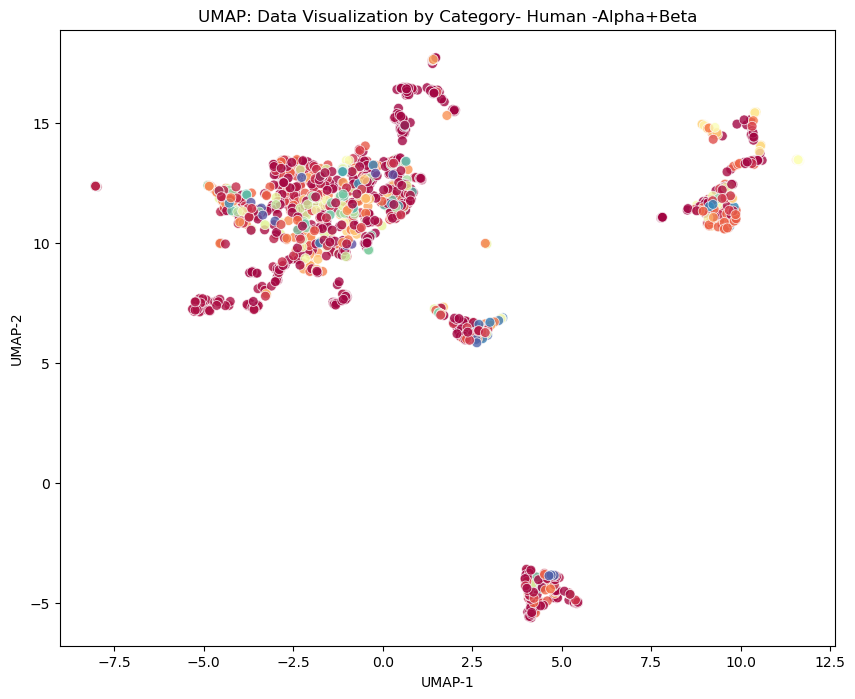

In [57]:
reducer = umap.UMAP(random_state= 42)
human_data = StandardScaler().fit_transform(human_paired)
embedding = reducer.fit_transform(human_data)
embedding_df = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])

l=df_ab_bh['epitope'].tolist()
embedding_df['epitope']=l

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP-1', y='UMAP-2', data=embedding_df,hue='epitope',palette='Spectral', s=50, alpha=0.8,legend=False)
plt.title('UMAP: Data Visualization by Category- Human -Alpha+Beta')
plt.show()

### checking the similarity using the blossum62 and pairwise2

The BLOSUM62 matrix is typically used to score alignments between sequences of amino acids, which helps in determining the degree of similarity or evolutionary distance between proteins. It's a tool often used in bioinformatics for tasks such as sequence alignment in programs like BLAST.

To find the similarity score between two epitopes (short sequences of amino acids that are recognized by the immune system), you can certainly use the BLOSUM62 matrix. Each pair of amino acids in the aligned sequences is scored based on the BLOSUM62 matrix, and these scores are summed to provide an overall similarity score for the alignment.

Here’s a basic idea of how you can use BLOSUM62 for scoring:

1. **Alignment**: First, you need to align the two epitope sequences. This could be a simple alignment if the sequences are of similar length and composition, or may require more sophisticated methods if they are dissimilar or of different lengths.

2. **Scoring the Alignment**: Using the BLOSUM62 matrix, score each aligned pair of amino acids. The BLOSUM62 matrix gives a score for every possible pair of amino acids, based on their likelihood of substitution during evolutionary changes.

3. **Calculate Total Score**: Sum up the scores for all the pairs in the alignment to get the total similarity score.

If you have specific epitope sequences and you'd like to calculate the similarity score using BLOSUM62, I can help you with that calculation. Just provide the sequences and I can walk you through the process or do the 

pip install biopython
computation.

In [133]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
def calculate_similarity(epitope1, epitope2):
    # Load the BLOSUM62 matrix
    matrix = substitution_matrices.load("BLOSUM62")
    
    # Perform a global alignment using the BLOSUM62 matrix
    alignments = pairwise2.align.globaldx(epitope1, epitope2, matrix)
    
    # Select the best alignment (highest score)
    top_alignment = alignments[0]
    aligned_epitope1, aligned_epitope2, score, begin, end = top_alignment
    
    # Print the alignment and the similarity score
    print("Alignment 1: ", aligned_epitope1)
    print("Alignment 2: ", aligned_epitope2)
    print("Similarity Score: ", score)

In [140]:
# Example epitopes
epitope1 = "CAAAASGGSYIPTF"
epitope2 = "CAADTLLNAGGTSYGKLTF"

# Calculate similarity
calculate_similarity(epitope1, epitope2)

Alignment 1:  CAAA-----ASGG-SY--IPTF
Alignment 2:  C-AADTLLNA-GGTSYGKL-TF
Similarity Score:  57.0


Result explaination:

1. **Alignment 1 and 2**: These are your two epitope sequences after alignment. Gaps are introduced (indicated by dashes "-") to maximize the alignment score based on the BLOSUM62 matrix. Each position in the alignment is either a matched pair of amino acids, a mismatch, or a gap in one of the sequences.
2. **Similarity Score**: This is the cumulative score of the aligned sequences. The score is calculated by adding up the individual scores for each pair of amino acids from the BLOSUM62 matrix. Matches, mismatches, and gaps all contribute to this score. The BLOSUM62 matrix assigns higher scores for more likely (conservative) substitutions and penalizes less likely (non-conservative) substitutions as well as gaps.

The score of 22.0 indicates that when the two sequences are optimally aligned (according to the rules of the BLOSUM62 matrix), the total score reflecting the similarity is 22. This score is a raw score, and whether it indicates a strong or weak similarity can depend on the length of the sequences and the typical scores seen for similar proteins. Higher scores generally indicate greater similarity or more conservative substitutions.ons.

### Prediction 

Human paired

### random forest baseline model 

In [498]:
human_paired=pd.read_csv("paired_vector_human_hamming.csv")
mouse_paired=pd.read_csv("paired_vector_mouse_hamming.csv")

In [499]:
human_paired=human_paired.drop(['Unnamed: 0','cdr3_a_aa','cdr3_b_aa','count'], axis=1)

In [459]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [460]:
X = human_paired.drop('epitope', axis=1)
y = human_paired['epitope']

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state=42)

In [462]:
column_trans = ColumnTransformer([('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), ['v_a_gene', 'j_a_gene', 'v_b_gene', 'j_b_gene'])],remainder='passthrough')

In [316]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['v_a_gene', 'j_a_gene', 'v_b_gene',
                                  'j_b_gene'])])

In [317]:
X_encoded_array = column_trans.fit_transform(X)

In [318]:
rf_pipeline = Pipeline([
    ('encoder', column_trans),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [319]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['v_a_gene', 'j_a_gene',
                                                   'v_b_gene', 'j_b_gene'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [320]:
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [321]:
rf_accuracy

0.39090909090909093

In [322]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, rf_predictions, average='macro')
recall = recall_score(y_test, rf_predictions, average='macro')
f1 = f1_score(y_test, rf_predictions, average='macro')
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.39090909090909093
Precision: 0.10988618488618487
Recall: 0.09739822467095192
F1 Score: 0.09290380286172713


C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Trail-1(Default)** 
Accuracy: 0.40454545
Precision: 0.12994389969769785
Recall: 0.1125429553264605
F1 Score: 0.110842069635344

**Trail-2(Hamming)**
Accuracy: 0.39090909090909093
Precision: 0.10988618488618487
Recall: 0.09739822467095192
F1 Score: 0.0929038028617271367

#Parameters of the random forest classifier to tune
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum number of levels in each tree
}

#GridSearchCV to tune the classifier
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

#Best model from grid search
best_model = grid_search.best_estimator_

#Predicting the test set results
predictions = best_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print("Best Grid Search Accuracy:", accuracy)
print("Best Parameters:", grid_search.best_params_)

In [323]:
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = list(column_trans.get_feature_names_out())

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
top_50_features = feature_importances_df.head(100)


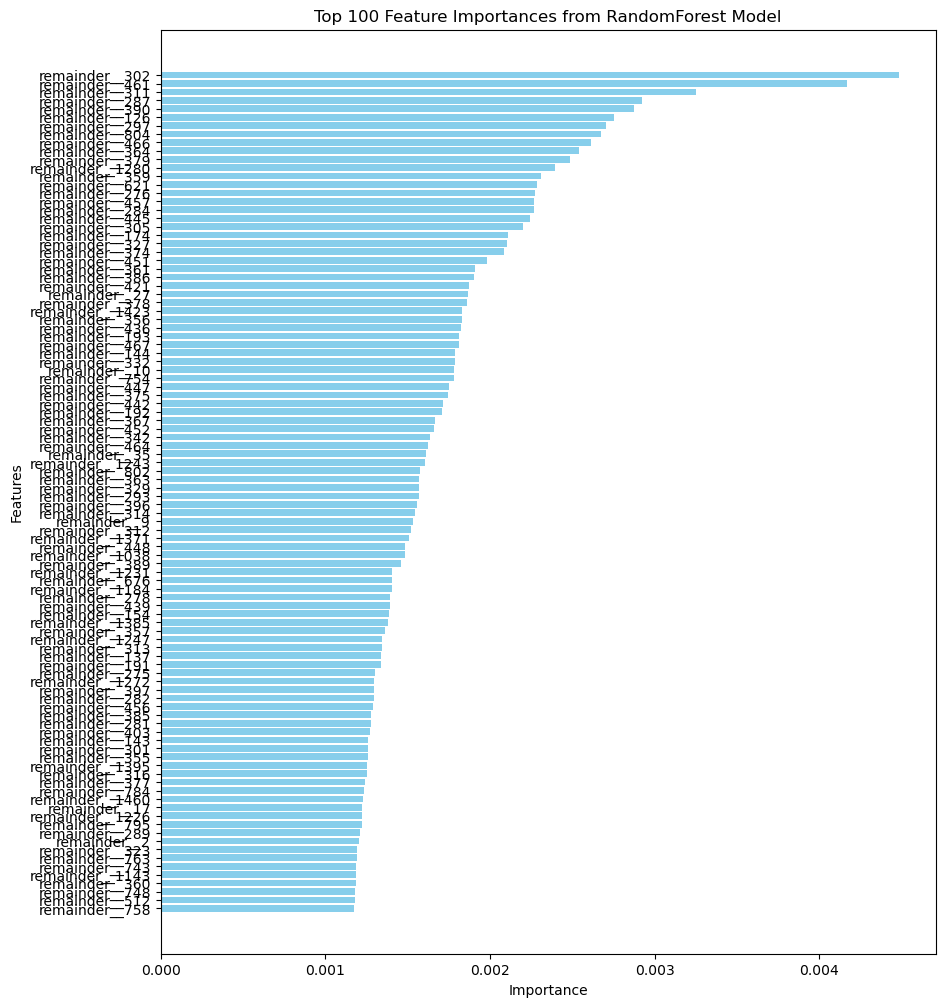

In [324]:
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 12))  # Adjusted size for better visibility
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 100 Feature Importances from RandomForest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

### KNN

#KNN Classifier Pipeline
knn_pipeline = Pipeline([
    ('encoder', column_trans),
    ('classifier', KNeighborsClassifier())
])

In [463]:
from sklearn.preprocessing import LabelEncoder

In [464]:
x_train=human_paired.drop(['v_b_gene','v_a_gene','j_a_gene','j_b_gene'], axis=1)

In [465]:
x_train

epitope   0   1   2   3   4   5   6   7   8   9  10  11  12  13  \
0       EPLPQGQLTAY   0  48  47  47  51  53  49  46  47  47  47  46  47  50   
1        GADGVGKSAL  48   0  39  39  47  49  38  43  37  42  42  41  28  26   
2         GILGFVFTL  47  39   0   1  37  48  35  33  33  28  28  24  39  39   
3         GILGFVFTL  47  39   1   0  37  49  35  33  33  29  29  25  39  39   
4         NLVPMVATV  51  47  37  37   0  39  45  30  30  48  48  45  34  49   
...             ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1457     GTSGSPIVNR  47  46  46  47  49  51  47  41  45  43  43  34  40  43   
1458  LLEFYLAMPFATP  51  45  40  40  54  53  49  46  44  42  42  45  50  48   
1459      YLQPRTFLL  55  47  29  30  48  50  43  43  39  31  31  31  43  42   
1460      QYIKWPWYI  57  58  56  56  63  62  59  56  60  63  62  58  54  56   
1461      NLVPMVATV  53  41  45  45  50  54  45  47  35  50  50  47  47  39   

      14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
0     47  55  50  54  48  47  51  48  42  48  48  51  46  49  50  54  52  48   
1     49  45  37  48  39  46  44  42  42  34  34  46  26  46  48  45  26  35   
2     45  40  23  27  23  38  44  41  42  41  41  45  42  46  33  41  37  47   
3     46  40  24  28  24  39  44  41  42  41  41  45  42  46  34  41  37  47   
4     43  47  33  44  26  37  36  35  45  47  47  38  40  45  42  37  44  51   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1457  45  54  43  51  45  42  48  47  45  48  48  45  42  51  52  49  46  50   
1458  52  48  44  48  44  52  53  45  49  40  40  51  50  50  48  53  46  50   
1459  53  47  29  37  31  47  47  49  46  47  47  50  51  50  37  49  46  54   
1460  63  61  61  62  62  55  53  60  56  60  60  62  57  63  63  52  56  39   
1461  50  48  46  52  45  48  51  50  46  32  32  40  48  47  52  51  44  52   

      32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  \
0     50  49  51  51  44  46  52  55  47  53  51  45  47  47  46  46  45  51   
1     33  36  49  45  43  49  42  46  37  48  46  38  37  37  37  37  44  43   
2     34  36  49  46  37  41  42  41  35  41  42  37  20  16  17  20  35  48   
3     34  36  49  46  37  42  42  41  35  41  43  38  21  17  18  21  35  48   
4     35  45  41  45  42  48  49  38  37  41  39  32  29  32  32  31  41  35   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1457  41  42  53  49  40  41  44  49  44  49  43  38  45  45  42  47  40  50   
1458  43  43  53  49  47  50  43  52  39  52  52  50  43  42  42  43  49  50   
1459  40  43  55  49  47  49  45  48  42  47  48  42  27  28  25  29  48  53   
1460  59  57  63  64  58  56  61  50  60  41  57  57  60  59  61  58  53  64   
1461  30  32  57  44  42  30  45  51  29  48  50  43  40  43  43  42  49  50   

      50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
0     45  41  41  49  47  47  47  47  47  43  40  46  50  48  50  47  50  49   
1     46  45  46  40  41  42  39  45  45  45  44  41  46  42  43  47  39  40   
2     39  40  40  37  27  45  37  36  36  38  39  23  47  36  39  39  37  26   
3     40  40  40  37  28  45  37  36  36  39  39  22  47  37  39  40  37  27   
4     48  43  43  27  43  55  33  30  31  42  42  40  48  44  37  48  44  43   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
1457  40  42  43  47  36  41  40  41  41  39  42  45  50  43  46  45  45  48   
1458  49  47  47  50  46  52  46  47  47  49  50  45  52  49  49  50  43  43   
1459  46  48  48  45  34  52  42  45  44  45  47  32  54  47  50  50  47  34   
1460  60  58  57  60  54  54  60  54  55  59  57  60  57  58  54  62  60  60   
1461  50  46  46  49  43  51  45  46  46  42  46  47  48  48  48  50  29  47   

      68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  \
0     45  44  49  48  52  54  49  47  42  51  47  52  47  51  48  47  50  50   
1     39  42  49  44

In [466]:
label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(x_train['epitope'])
y_encoded=x_train['epitope']
X = x_train.drop('epitope', axis=1)

In [467]:
# Remove the last 200 columns
X = X.iloc[:, :-200]

# Split the data: the last 200 rows for testing, the rest for training
X_train = X.iloc[:-200, :]
X_test = X.iloc[-200:, :]

y_train = x_train['epitope'][:-200]
y_test = y_encoded[-200:]

In [468]:
knn = KNeighborsClassifier(n_neighbors=10, metric='precomputed',weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='precomputed', n_neighbors=10, weights='distance')

In [469]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy 0.215
Precision: 0.12461214586329003
Recall: 0.215
F1 Score: 0.15214761904761906


C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Trail-1(hamming)**
Accuracy: 0.215
Precision: 0.12461214586329003
Recall: 0.215
F1 Score: 0.15214761904761906


In [470]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of K values to evaluate
k_values = [5, 10, 30, 50, 75, 100]

# Results dictionary to store the performance metrics for each K
results = {}

# Loop through each K value
for k in k_values:
    # Create a KNN classifier with the current K, using 'distance' weights and a precomputed metric
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed', weights='distance')
    
    # Fit the model (Note: X_train must be a distance matrix for 'precomputed' metric)
    knn.fit(X_train, y_train)  # X_train should be a distance matrix here
    
    # Predict on the test data
    y_pred = knn.predict(X_test)  # X_test should also be a distance matrix
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results for this K value
    results[k] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print all results
for k, metrics in results.items():
    print(f"Results for K={k}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print()

C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWar

Results for K=5:
  Accuracy: 0.2100
  Precision: 0.2134
  Recall: 0.2100
  F1 Score: 0.1773

Results for K=10:
  Accuracy: 0.2150
  Precision: 0.1246
  Recall: 0.2150
  F1 Score: 0.1521

Results for K=30:
  Accuracy: 0.1750
  Precision: 0.1112
  Recall: 0.1750
  F1 Score: 0.1087

Results for K=50:
  Accuracy: 0.1900
  Precision: 0.1450
  Recall: 0.1900
  F1 Score: 0.1145

Results for K=75:
  Accuracy: 0.1700
  Precision: 0.0881
  Recall: 0.1700
  F1 Score: 0.0831

Results for K=100:
  Accuracy: 0.1650
  Precision: 0.0473
  Recall: 0.1650
  F1 Score: 0.0733



C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWar

### Mouse

In [500]:
mouse_paired1=mouse_paired.drop(['Unnamed: 0','cdr3_a_aa','cdr3_b_aa','count'], axis=1)

In [501]:
x_train=mouse_paired1.drop(['v_b_gene','v_a_gene','j_a_gene','j_b_gene'], axis=1)

In [502]:
y_encoded=x_train['epitope']
X = x_train.drop('epitope', axis=1)

In [503]:
# Remove the last 200 columns
X = X.iloc[:, :-200]

# Split the data: the last 200 rows for testing, the rest for training
X_train = X.iloc[:-200, :]
X_test = X.iloc[-200:, :]

y_train = y_encoded[:-200]
y_test = y_encoded[-200:]

In [504]:
len(y_train)

589

In [505]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of K values to evaluate
k_values = [5, 10, 30, 50, 75, 100]

# Results dictionary to store the performance metrics for each K
results = {}

# Loop through each K value
for k in k_values:
    # Create a KNN classifier with the current K, using 'distance' weights and a precomputed metric
    knn = KNeighborsClassifier(n_neighbors=k, metric='precomputed', weights='distance')
    
    # Fit the model (Note: X_train must be a distance matrix for 'precomputed' metric)
    knn.fit(X_train, y_train)  # X_train should be a distance matrix here
    
    # Predict on the test data
    y_pred = knn.predict(X_test)  # X_test should also be a distance matrix
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results for this K value
    results[k] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print all results
for k, metrics in results.items():
    print(f"Results for K={k}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1 Score: {metrics['F1 Score']:.4f}")
    print()

C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWar

Results for K=5:
  Accuracy: 0.7400
  Precision: 0.7136
  Recall: 0.7400
  F1 Score: 0.7226

Results for K=10:
  Accuracy: 0.7550
  Precision: 0.7394
  Recall: 0.7550
  F1 Score: 0.7433

Results for K=30:
  Accuracy: 0.7800
  Precision: 0.7457
  Recall: 0.7800
  F1 Score: 0.7494

Results for K=50:
  Accuracy: 0.7700
  Precision: 0.7412
  Recall: 0.7700
  F1 Score: 0.7381

Results for K=75:
  Accuracy: 0.7350
  Precision: 0.6725
  Recall: 0.7350
  F1 Score: 0.6943

Results for K=100:
  Accuracy: 0.7200
  Precision: 0.6618
  Recall: 0.7200
  F1 Score: 0.6824



C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for mouse, before increasing the weights, was getting an accuracy of 74 amx, now after the increase in weight an accuracy of 0.78 can be obtained from k value of 30

In [506]:
knn = KNeighborsClassifier(n_neighbors=30, metric='precomputed',weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='precomputed', n_neighbors=30, weights='distance')

In [507]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

C:\Users\shara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


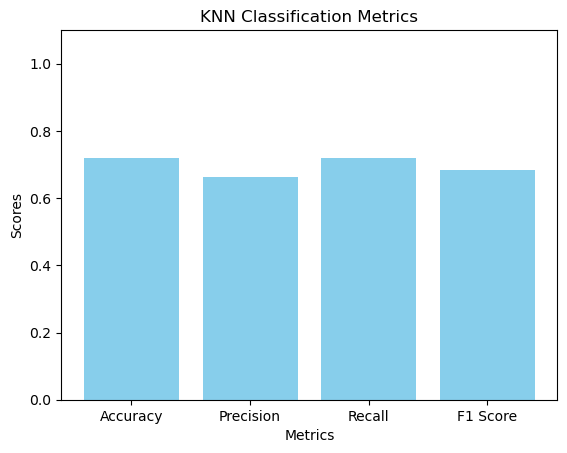

In [508]:
# Plotting the metrics
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.bar(metric_names, metrics, color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('KNN Classification Metrics')
plt.ylim(0, 1.1)  # Adjust y-axis limits to fit the score range
plt.show()

In [509]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
from scipy.spatial.distance import cdist

ValueError: multiclass format is not supported

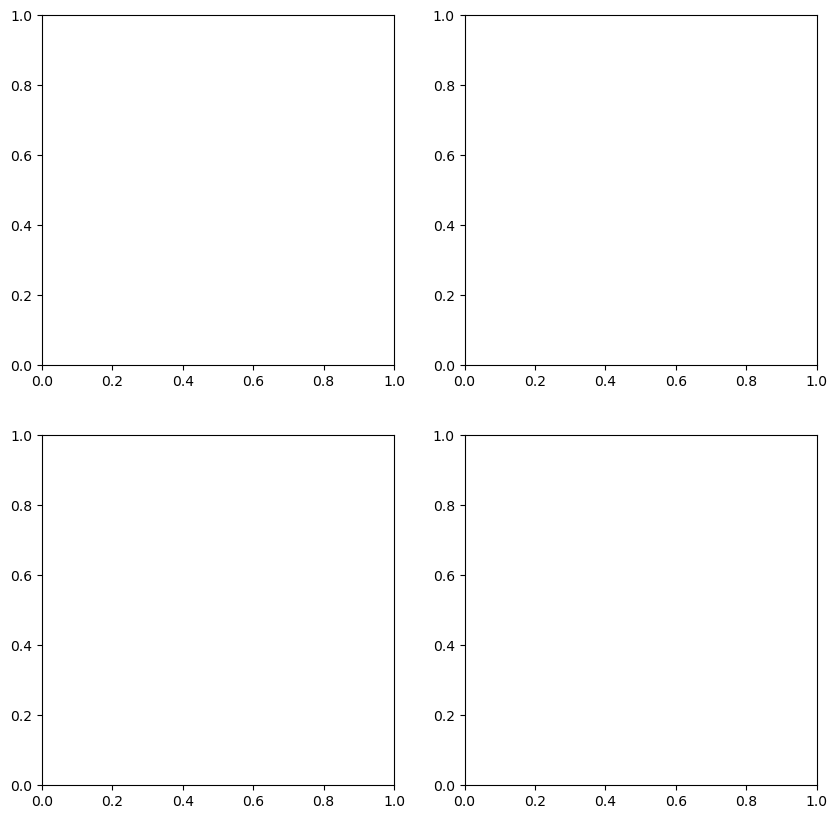

In [511]:
# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
axes[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, knn.predict_proba(X_test)[:, 1])
axes[1].plot(recall, precision, label=f'AP = {average_precision:.2f}')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend(loc="lower left")

# Bar plot for accuracy, precision, recall, and F1 score
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
axes[2].bar(metric_names, metrics, color='skyblue')
axes[2].set_ylim(0, 1.1)
axes[2].set_title('Classification Metrics')

# As KNN doesn't have feature importances, we'll leave the fourth subplot empty or use it for something else.

plt.tight_layout()
plt.show()

In [512]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output classes if you have a multiclass problem
y_train_binarized = label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Fit the KNN model (as before)

# Predict the probabilities for each class
y_score = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
n_classes = y_train_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot(all_fpr, mean_tpr, label=f'mean ROC (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


IndexError: index 11 is out of bounds for axis 1 with size 11

In [514]:
# Ensure the number of classes matches the problem
unique_classes = np.unique(np.concatenate((y_train, y_test), axis=0))
n_classes = len(unique_classes)

# Binarize the output classes
y_train_binarized = label_binarize(y_train, classes=unique_classes)
y_test_binarized = label_binarize(y_test, classes=unique_classes)

# Check if the KNN model is fitted and ready to predict
y_score = knn.predict_proba(X_test)

# Sanity checks
assert y_score.shape[1] == n_classes, "The number of predicted classes does not match n_classes."
assert y_test_binarized.shape[1] == n_classes, "The number of true classes does not match n_classes."


AssertionError: The number of predicted classes does not match n_classes.

In [515]:
n_classes

50

In [516]:
y_score.shape[1]

46